# Linear and Nonlinear Optimization

![Tokyo Woman's Christian University (TWCU)](res/twcu_logo.png)

- Kai Torben OHLHUS
  - email: <ohlhus@lab.twcu.ac.jp>
- Winter 2021
- Last update: 2021-09-06
  
> This optimization course is based on lecture material by
> [C. Jansson](https://www.tuhh.de/ti3/jansson/).

## Introduction

This one semester course is prepared for students
of engineering and computer science.
It will introduce the **classical optimization methods**.
The topics covered in this course include:

- Optimality conditions for finite-dimensional (un-)constrained problems
- Dynamical systems and the Theorem of Pontryagin in the infinite-dimensional case
- Convex analysis
- (Un-)constrained optimization methods including interior point methods
- Many examples

Duration: 14 weeks, 1.5 hours per week

**Prerequisites: Knowledge of elementary Calculus and Linear Algebra.**

> **Please note:** these lecture notes are **not complete**.
> Several additional parts, comments, proofs, and intermediate calculations
> are given on the blackboard.

## Literature

- Cottle, Thapa:
  *Linear and Nonlinear Optimization*,
  Springer, 2017.
  [doi:10.1007/978-1-4939-7055-1](https://doi.org/10.1007/978-1-4939-7055-1)
  (ISBN: 978-1-4939-7053-7)

- Luenberger, Ye:
  *Linear and Nonlinear Programming*,
  Springer, 2016.
  [doi:10.1007/978-3-319-18842-3](https://doi.org/10.1007/978-3-319-18842-3)
  (ISBN: 978-3-319-18841-6)

- Bertsekas:
  *Nonlinear Programming*,
  Athena Scientific, 2016.
  <http://www.athenasc.com/nonlinbook.html>
  (ISBN: 978-1-886529-05-2)

- Griva, Nash, Sofer:
  *Linear and Nonlinear Optimization*,
  SIAM, 2008.
  <http://bookstore.siam.org/OT108/>
  (ISBN: 978-0-89871-661-0)

- Boyd, Vandenberghe:
  *Convex Optimization*,
  Cambridge University Press, 2004.
  <https://web.stanford.edu/~boyd/cvxbook/>
  (ISBN: 978-0-521-83378-3)

## The optimization problem

$$
\begin{array}{lll}
\textrm{minimize}   & f_{0}(x)         & \\
\textrm{subject to} & f_{i}(x) \leq 0, & i = 1, \ldots, m
\end{array}
$$

- $x = (x_{1}, x_{2}, \ldots)$:
  **optimization variables**

- $f_{0} \colon \mathcal{X} \to \mathbb{R}$:
  **objective function**

- $f_{i} \colon \mathcal{X} \to \mathbb{R}, i = 1, \ldots, m$:
  **constraint functions**

Decision set $\mathcal{X}$ may be $\mathbb{R}^{n}$,
a set of matrices,
a discrete set,
or an infinite dimensional set.

**Optimal solution** $x^{*}$ has smallest value of $f_{0}$
among all vectors that satisfy the constraints,
i.e. that are **feasible**.

### Unconstrained example

Global and local optima of a two-dimensional function.

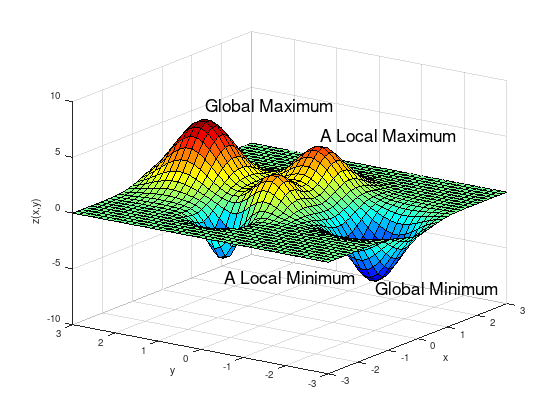

In [1]:
N = 3;
[X,Y] = meshgrid (linspace (-N, N, 40));

% Gaussian probability density function (PDF)
GAUSS = @(sigma, mu)  1 / (sigma * sqrt (2*pi)) * ...
                      exp (-0.5 * ((X - mu(1)).^2 + (Y - mu (2)).^2) / sigma^2);

Z = 9 * GAUSS (0.6, [ 0.0,  2.0]) + 5 * GAUSS (0.5, [ 1.0,  0.0]) ...
  + 3 * GAUSS (0.4, [-0.5,  0.0]) - 3 * GAUSS (0.3, [-1.5,  0.5]) ...
  - 7 * GAUSS (0.5, [ 0.0, -2.0]);

surf (X, Y, Z);
xlabel ('x');
ylabel ('y');
zlabel ('z(x,y)');
colormap ('jet');
props = {'FontSize', 18};
text ( 0.0, -2.0, -6.2, 'Global Minimum', props{:});
text ( 0.0,  2.0,  7.2, 'Global Maximum', props{:});
text (-1.5,  0.5, -5.5, 'A Local Minimum', props{:});
text ( 1.0,  0.0,  5.0, 'A Local Maximum', props{:});
view (-55, 21)

### Two-dimensional constrained example

A simple problem can be defined by the constraints
$$
\begin{array}{l}
x_1 \geq 0, \\
x_2 \geq 0, \\
x_1^2 + x_2^2 \geq 1, \\
x_1^2 + x_2^2 \leq 2,
\end{array}
$$
with an objective function to be maximized
$$
f(x) = x_1 + x_2
$$

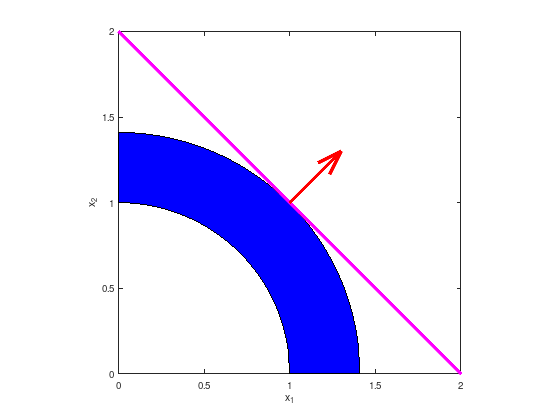

In [30]:
% Visualize constrained set of feasible solutions (blue).
circ = @(x) sqrt (max(x)^2 - x.^2);
x_11 = 0:0.01:sqrt(2);
x_21 = circ (x_11);
x_12 = 1:-0.01:0;
x_22 = circ (x_12);
area ([x_11, x_12], [x_21, x_22], 'FaceColor', 'blue');

% Visualize level set of the objective function (magenta)
% and its scaled gradient (red arrow).
hold on;
plot ([0 2], [2 0], 'LineWidth', 4, 'm');
quiver (1, 1, 0.3, 0.3, 'LineWidth', 4, 'r');
axis equal
xlim ([0 2])
ylim ([0 2])
xlabel ('x_1')
ylabel ('x_2')

The intersection of the level-set of the objective function ($f(x) = 2 = const.$)
and the constrained set of feasible solutions represents the solution.

> $\max f(x) = -\min -f(x)$

In these lectures we are mainly interested in methods for computing local minima.

### Applications, examples and software

Good ressource is the homepage by Hans D. Mittelman:
<http://plato.asu.edu/guide.html>.

- **problems/software:** software sorted by problem to be solve
- **benchmarks:** collection of test results and performance tests
- **test cases:** example files ready to use with existing software, in different formats
- **books/tutorials:** a short list of introductory texts, some online
- **tools:** software which helps formulating an optimization problem or simplifying its solution

### Modelling

- **Real world problem:** mathematical formulation, preferable as a tractable (linear or convex) problem.
- **Software:** try to classify the problem, in order to find the appropriate software.
- **Solution:** depends on your choice of the mathematical model, and the input data.

Nearly all scientific and engineering fields make knowingly or unknowingly use of some kind of optimization techiques. 
Starting with "Operations Research", "Machine Learning", ... It is superfluous to write them all down.

Even nature optimizes.
The basic laws of nature can be formulated in terms of least action principles.
Therefore only two small examples with typical properties.